## Packages and Data import

1. Data Cleaning (1 pt):

Clean the data where necessary to prepare it for analysis.

2. Data Exploration (2 pts):

Explore the data to identify patterns and insights. Provide commentary on the analysis.

3. Linear Regression (2 pts):

Train and test multiple linear regression with price as the response variable and carat, depth, table, width, length, and height as the predictor variables.

4. Polynomial Regression (2 pts):

Train and test a polynomial model of degree=2  with price as the response variable and carat, depth, table, width, length, and height as the predictor variables.

5. Result Analysis (5 pts):

Provide commentary on the output, addressing the following points:
Discuss the significance of the coefficients of the variables and what they suggest.
Discuss the mean squared errors.

### Data Cleaning

In [16]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# import data
diamonds = pd.read_csv('drive/MyDrive/data_science/diamonds_casestudy.csv')

#### Remove Nulls

In [18]:
# Find null values
print(diamonds.isnull().sum())
print(diamonds.shape)

# Remove rows with null values
diamonds.dropna(inplace=True)

print(diamonds.isnull().sum())
print(diamonds.shape)

carat       0
cut         0
color       0
clarity     0
depth      50
table       0
price       0
width       0
length      0
height      0
dtype: int64
(53940, 10)
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
width      0
length     0
height     0
dtype: int64
(53890, 10)


In [19]:
print(diamonds.head())

   carat      cut color clarity  depth  table  price  width  length  height
0   0.23    Ideal     E     SI2   61.5   55.0    326   3.95    3.98    2.43
1   0.21  Premium     E     SI1   59.8   61.0    326   3.89    3.84    2.31
2   0.23     Good     E     VS1   56.9   65.0    327   4.05    4.07    2.31
3   0.29  Premium     I     VS2   62.4   58.0    334   4.20    4.23    2.63
4   0.31     Good     J     SI2   63.3   58.0    335   4.34    4.35    2.75


#### Remove Duplicates

In [20]:
# check for duplicates
print(diamonds.duplicated().sum())

# drop duplicates
diamonds.drop_duplicates(inplace=True)

print(diamonds.duplicated().sum())

144
0


### Data Exploration

In [21]:
print(diamonds.describe())

              carat         depth         table         price         width  \
count  53746.000000  53746.000000  53746.000000  53746.000000  53746.000000   
mean       0.797624     61.747661     57.458172   3932.141759      5.730915   
std        0.473209      1.429855      2.233559   3987.315942      1.120505   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

             length        height  
count  53746.000000  53746.000000  
mean       5.734366      3.538505  
std        1.141052      0.704914  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  


In [22]:
# Distribution of categorical variables
print(diamonds['cut'].value_counts())
print(diamonds['color'].value_counts())
print(diamonds['clarity'].value_counts())

cut
Ideal        21469
Premium      13736
Very Good    12056
Good          4889
Fair          1596
Name: count, dtype: int64
color
G    11253
E     9768
F     9518
H     8261
D     6748
I     5400
J     2798
Name: count, dtype: int64
clarity
SI1     13019
VS2     12217
SI2      9143
VS1      8148
VVS2     5053
VVS1     3644
IF       1784
I1        738
Name: count, dtype: int64


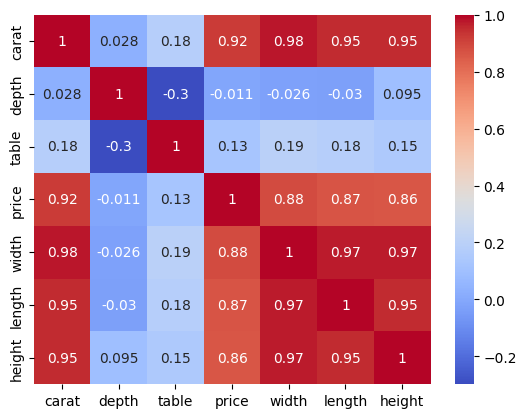

In [23]:
# import seaborn
import seaborn as sns

numerical_df = diamonds.drop(['cut', 'color', 'clarity'], axis=1)

# Correlation matrix
diamonds_corr = numerical_df.corr()

sns.heatmap(diamonds_corr, annot=True, cmap='coolwarm')

plt.show()

It seems that depth and table have almost no correlation with any other column

I think I can remove these columns from the model

<Axes: xlabel='carat', ylabel='price'>

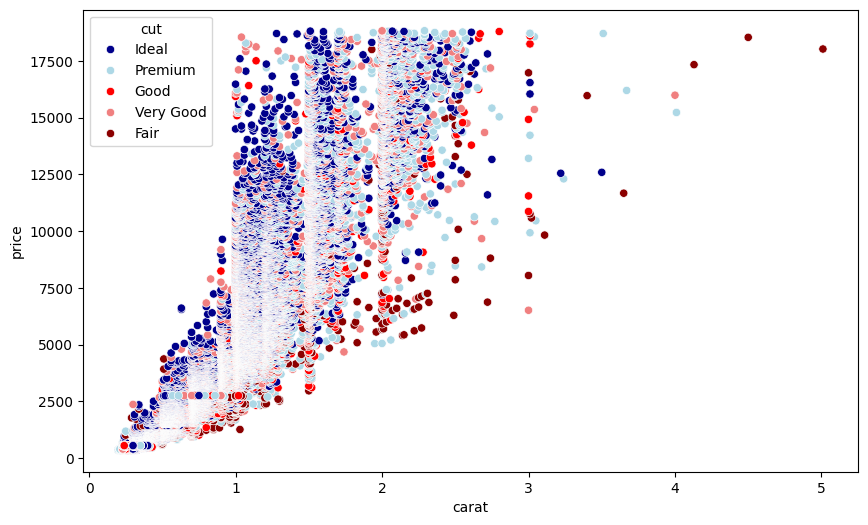

In [25]:

custom_palette = {
    'Ideal': 'darkblue',
    'Premium': 'lightblue',
    'Very Good': 'lightcoral',
    'Good': 'red',
    'Fair': 'darkred'
}

plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=diamonds, hue='cut', palette=custom_palette)

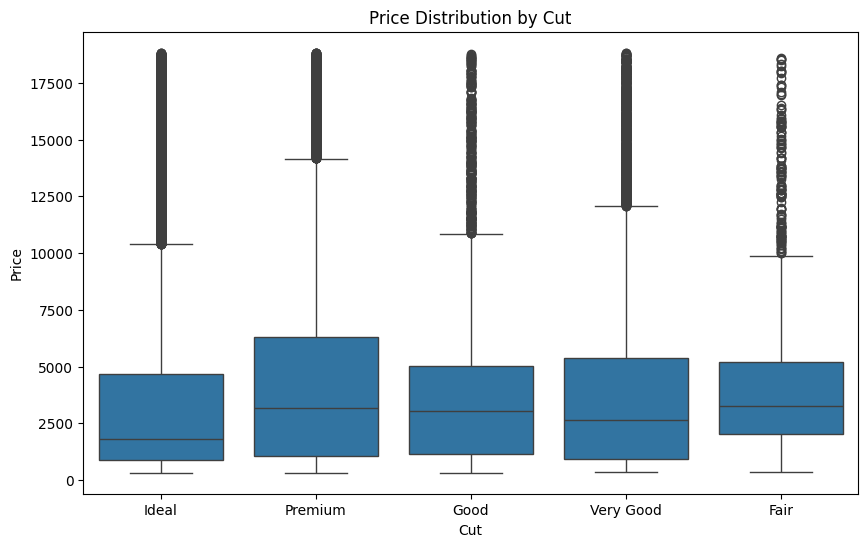

In [27]:
# Box plot for 'cut' vs 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Price Distribution by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

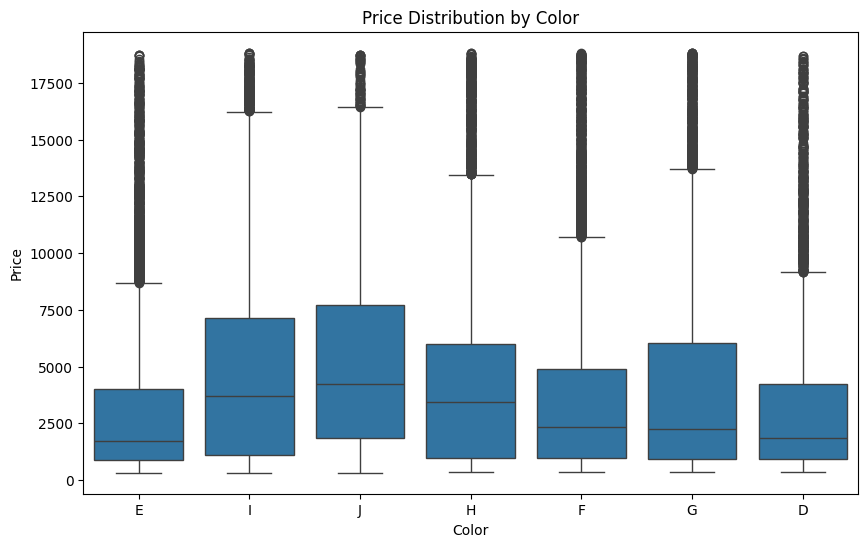

In [28]:
# Box plot for 'color' vs 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=diamonds)
plt.title('Price Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

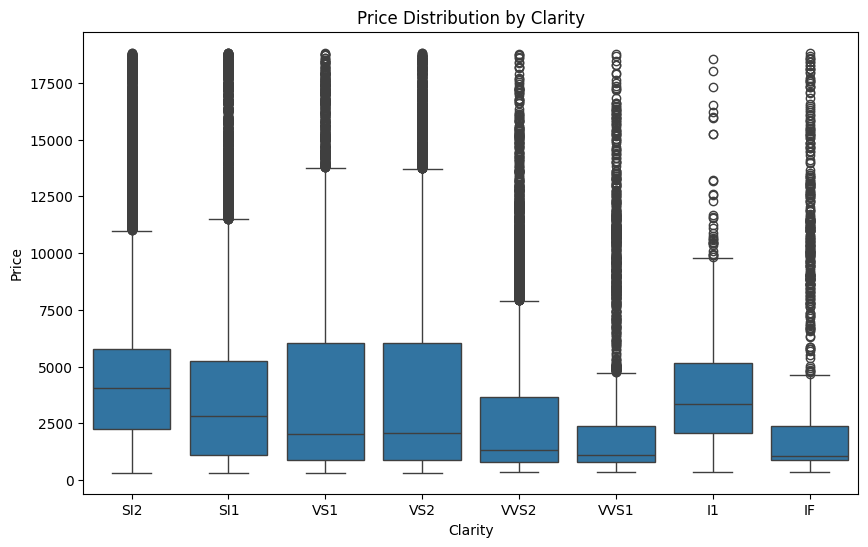

In [29]:
# Box plot for 'clarity' vs 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=diamonds)
plt.title('Price Distribution by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()

So many outliers price outliers

In [59]:
# grab outliers
def grab_outliers(col):
  q1 = col.quantile(0.25)
  q3 = col.quantile(0.75)
  iqr = q3 - q1

  outliers = col[((col < (q1-1.5*iqr)) | (col > (q3+iqr*1.5)))]
  # drop outliers
  # print(outliers.index)
  # iterate through outliers.index and remove them from the column
  return outliers

outliers = grab_outliers(diamonds['carat'])
numerical_df = diamonds.drop(['cut', 'color', 'clarity'], axis=1)
categorical_df = diamonds[['cut', 'color', 'clarity']]

for col in numerical_df.columns:
  outliers = grab_outliers(numerical_df[col])
  print('Number of outliers in', col, ': ', len(outliers))

# drop all outliers and print total outliers
def drop_outliers(dataset, outliers, col):
  for outlier in outliers:
    print('Outlier: ', outlier)
    for index, row in dataset.iterrows():
      if outlier == row[col]:
        # print('Row: ', row)
        dataset = dataset.drop(index, axis=0)
  return dataset

# for col in numerical_df.columns:
#   outliers = grab_outliers(numerical_df[col])
#   diamonds = drop_outliers(diamonds, outliers, col)

# for col in numerical_df.columns:
#   outliers = grab_outliers(numerical_df[col])
#   print('Number of outliers in', col, ': ', len(outliers))

Number of outliers in carat :  1868
Number of outliers in depth :  2523
Number of outliers in table :  604
Number of outliers in price :  3522
Number of outliers in width :  31
Number of outliers in length :  28
Number of outliers in height :  48


This function will take years to complete so I think I dont want to remove outliers esspecially since there is such a high correlation between most numerical columns and price

## Linear Regression

In [54]:
# linear regression model predicting price using carat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


y = diamonds['price'].values.reshape(-1, 1)
x = diamonds.drop(['price', 'cut', 'color', 'clarity'], axis=1)

multiple_lr = LinearRegression()
multiple_lr.fit(x, y)
y_hat = multiple_lr.predict(x)
mse = mean_squared_error(y, y_hat)
r2 = r2_score(y, y_hat)

print('Coefficients: ', multiple_lr.coef_)
print('Intercept: ', multiple_lr.intercept_)
print('Mean Squared Error: ', mse)
print('R2 Score: ', r2)

Coefficients:  [[10776.11514889  -205.05086339  -102.77740039 -1347.05422353
     63.19264506    42.71446701]]
Intercept:  [21110.00209043]
Mean Squared Error:  2233543.2808306823
R2 Score:  0.8595113773044557


In [55]:
# match each column with their coefficient
coefficients = multiple_lr.coef_[0]
column_names = x.columns
for i in range(len(column_names)):
    print(column_names[i], ': ', coefficients[i])


carat :  10776.115148890685
depth :  -205.05086338909325
table :  -102.77740039138374
width :  -1347.05422353197
length :  63.192645055730054
height :  42.71446700764983


## Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_polynomial = poly_features.fit_transform(x)
x_polynomial.shape

(53746, 27)

In [57]:
multiple_lr = LinearRegression()
multiple_lr.fit(x_polynomial, y)
y_hat = multiple_lr.predict(x_polynomial)
mse = mean_squared_error(y, y_hat)
print('MSE: ', mse)
print('R^2: ', multiple_lr.score(x_polynomial, y))
print('Intercept: ', multiple_lr.intercept_)
print('Coefficients: ', multiple_lr.coef_)

MSE:  1963474.1296382786
R^2:  0.8764985758106179
Intercept:  [-76852.92967972]
Coefficients:  [[ 3.39626512e+02  1.79734457e+03  5.82786241e+02 -2.64913423e+04
   3.69693387e+04 -1.10438800e+04 -4.45523161e+03  2.25002419e+00
   6.87325144e+01  7.80662536e+02  3.02463875e+03 -2.71550545e+03
  -8.02802637e+00 -7.70901071e+00  3.07314287e+02 -2.11601673e+02
  -2.78759204e+02  1.51065620e+00  2.15631389e+02 -4.55272819e+02
   2.73454033e+02  1.18521497e+03 -1.87627851e+03 -3.05256161e+03
  -4.80294743e+02  5.28515671e+03  8.94120621e+01]]


## Results Analysis

- Im surprise by the large negative coefficient of the width of the diamond in the Linear Regression model. In the correlation matrix this showed as a positive relationship with price so to see it is a negative coefficient is counter intuitive to me. I'm reading that this could be to account for other variables influence in the model.

- In the polynomial regression each column is represented by 3 coefficient, this is denoted by the degree of 2. There is the intercept, linear and quadratic terms.

- The mean squared error is quite high. I believe this is due to the degree of variance in the data. The graphs suggested that there were a lot of carat, price and depth outliers and I believe this had a direct effect on the MSE.

- 87% of the variance in the dependent varaible is explained by the independent varaible in this model. This is denoted by the R^2 value. With the MSE being so high I am led to believe that the model may not be as good of a fit as the R^2 may lead me to believe. I believe some removal of outliers could lower the MSE and increase the R^2.